# Read the data

In [284]:
import pandas as pd

In [285]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

In [286]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


# Columns description

- CLIENTNUM - Client number. Unique identifier for the customer holding the account
- Attrition_Flag - Internal event (customer activity) variable, Existing Customer or Attrited Customer
- Customer_Age - Demographic variable - Customer's Age in Years
- Gender - Demographic variable - M=Male, F=Female
- Dependent_count - Demographic variable - Number of dependents
- Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status - Demographic variable - Married, Single, Divorced, Unknown
- Income_Category - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > 
- Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book - Period of relationship with bank
- Total_Relationship_Count - Total no. of products held by the customer
- Months_Inactive_12_mon - No. of months inactive in the last 12 months
- Contacts_Count_12_mon - No. of Contacts in the last 12 months
- Credit_Limit - Credit Limit on the Credit Card
- Total_Revolving_Bal - Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1) 
- Total_Trans_Amt - Total Transaction Amount (Last 12 months)
- Total_Trans_Ct - Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1) 
- Avg_Utilization_Ratio - Average Card Utilization Ratio

Your goal is to predict whether the client will churn or not. 

# 1. What is the target column?

- Attrition_Flag
- Marital_Status
- Gender
- Months_on_book
- Avg_Utilization_Ratio

### Answer: 

My target column is "Attrition_Flag" - this column represents whether the client has churned or not

# 2. Transform target column

Transform target column to 1/0 format, 1 if the client will churn, 0 otherwise. What is the percetange of churned customers?

In [287]:
df['Attrition_Flag'].replace(to_replace='Existing Customer', value=0, inplace=True)
df['Attrition_Flag'].replace(to_replace='Attrited Customer',  value=1, inplace=True)

In [288]:
df["Attrition_Flag"].dtype

dtype('int64')

In [289]:
# Count the number of churned customers
churned_customers = df[df['Attrition_Flag'] == 1]
num_churned_customers = len(churned_customers)

# Calculate the total number of customers
total_customers = len(df)

# Calculate the percentage of churned customers
percentage_churned = (num_churned_customers / total_customers) * 100

# Print the result
print(f"Percentage of churned customers: {percentage_churned:.2f}%")

Percentage of churned customers: 16.07%


# Drop `CLIENTNUM` column, as all clients are unique

In [290]:
df = df.drop('CLIENTNUM', axis=1)

In [291]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# 3. Analyse columns, which are numerical, which are categorical?

How many numerical and categorical columns do you have (excluding target variable)


In [292]:
df.shape

(10127, 20)

In [293]:
df.dtypes.sort_values()

Attrition_Flag                int64
Total_Trans_Ct                int64
Total_Trans_Amt               int64
Total_Revolving_Bal           int64
Contacts_Count_12_mon         int64
Months_Inactive_12_mon        int64
Months_on_book                int64
Total_Relationship_Count      int64
Dependent_count               int64
Customer_Age                  int64
Total_Ct_Chng_Q4_Q1         float64
Credit_Limit                float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Avg_Utilization_Ratio       float64
Income_Category              object
Marital_Status               object
Education_Level              object
Gender                       object
Card_Category                object
dtype: object

In [294]:
# Exclude the target variable from the analysis
target_variable = 'Attrition_Flag'
columns_to_analyze = [col for col in df.columns if col != target_variable]

# Analyze the data types of the columns
numerical_columns = []
categorical_columns = []

for col in columns_to_analyze:
    if df[col].dtype in ['int64', 'float64']:
        numerical_columns.append(col)
    elif df[col].dtype == 'object':
        categorical_columns.append(col)

# Count the number of numerical and categorical columns
num_numerical_columns = len(numerical_columns)
num_categorical_columns = len(categorical_columns)

# Print the results
print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")
print(f"Number of numerical columns: {num_numerical_columns}")
print(f"Number of categorical columns: {num_categorical_columns}")

Numerical columns: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Categorical columns: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Number of numerical columns: 14
Number of categorical columns: 5


# 4. Perform EDA (optional)

Plot 1-5 Graphs looking for interesting data patterns. Each graph must contain a short description. You can use ChatGPT to generate ideas for graphs. If you use ChatGPT include your prompt into the document. Each of 5 graphs worth 1 point.

Checklist:
1. For each graph:
    1. Graph
        - has title
        - has labels for OX and OY 
        - has legend
    2. Graph description (<100 words)
    3. ChatGPT prompt included (if you've used one)
2. All graphs in a single pdf document

Put all graphs into a single doc file, save it as pdf and upload to the google form. For reference, this whole text is 105 words.

#  5. What are the different ways to handle categorical columns?


Before training machine learning algorithm we need to convert categorical columns



### Answer:

+ Ordinal Encoding
+ One-Hot Encoding

Also we can apply Ordinal Encoding for the columns: 'Education_Level', 'Income_Category', 'Card_Category'. But this option is not presented within the possible answers

# 6. Encode categorical columns with 1-hot encoding

How many binary columns after encoding do you have? Use `OneHotEncoder` from `slearn.preprocessing` module with `sparse=False` parameter. See example below.


In [295]:
from sklearn.preprocessing import OneHotEncoder

# Set names of categorical columns
print(f"Categorical columns: {categorical_columns}")

Categorical columns: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [296]:
# Create OneHotEncoder object
encoder = OneHotEncoder(sparse=False)

# Transform categorical columns and save them into array
cat_encoded = encoder.fit_transform(df[categorical_columns],)

# Save categorical columns to pandas.DataFrame, with correct column names
df_encoded = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Check the resulting DataFrame
df_encoded

/home/aism/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Drop original categorical columns and concat encoded with the numerical columns

assuming your encoded columns are in `df_encoded` variable

In [297]:
df = df.drop(categorical_columns, axis=1)

In [298]:
df = pd.concat([df, df_encoded], axis=1)

In [299]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [300]:
# Save to csv 
df.to_csv("df_encoded", index=False)

# 7. Split data intro train and test parts

Set the size of the test set to 30%, use startification over the target column (to preserve target ratio in train and test sets). Use `random_state=10`. How many observations do you have in your test set?


In [301]:
from sklearn.model_selection import train_test_split

In [302]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Split the data into train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

# Print the sizes of the train and test sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))

Train set size: 7088
Test set size: 3039


### Answer:
there are 3039 observations in test set

# 8. This is a binary classification problem with  imbalanced classes, what are the appropriate metrics for this task?

select all which apply

- accuracy score
- roc auc score
- f1 score
- mean absolute error
- r-squared
- precision

### Answer:
- ROC AUC
- F1 Score
- Precision

Accuracy could also be used, but in a case of imbalanced classes usage of the metric could be misleading

# 9. Train a Random Forest Classifier on a `train` set

Use RandomForestClassifier with default hyperparameters. What is the f1 score of a trained model on a test set?

In [303]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Create a Random Forest Classifier with default hyperparameters
rf_classifier = RandomForestClassifier()

# Train the classifier on the train set
rf_classifier.fit(X_train_rf, y_train_rf)

# Obtain predicted probabilities for the test set
y_pred_prob_rf = rf_classifier.predict_proba(X_test_rf)[:, 1]  # Assuming class 1 corresponds to positive class

# Convert probabilities to binary predictions
y_pred_rf = (y_pred_prob_rf > 0.5)

# Calculate the F1 score of the trained model on the test set
f1 = f1_score(y_test_rf, y_pred_rf)

# Print the F1 score
print("F1 score:", f1)

F1 score: 0.8303571428571428


# 10. Build a confusion matrix with a default probability threshold (0.5)

To analyse the resulting algorithm we will take a closer look on individual predictions. How many False Positives and False Negatives do you have?


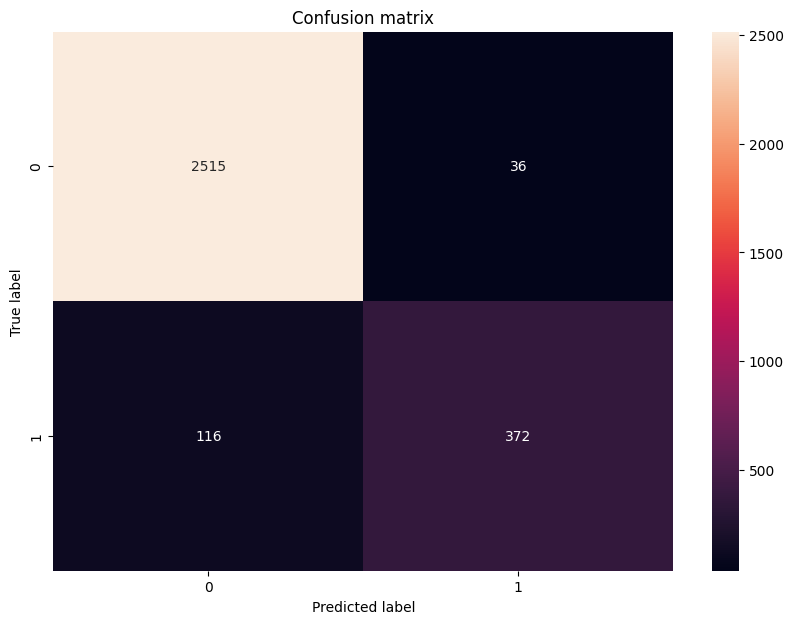

In [306]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test_rf, y_pred_rf)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Answer:
FP: 36, FN: 116 

# 11. We will change probability threshold from 0.05 to 0.95 with step 0.05

What happens to the number of True Positives and to the number of False Negatives, as you increase the probability threshold?


In [307]:
import numpy as np

In [309]:
true_positives = []
false_negatives = []
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(y_test_rf, y_pred_prob_rf>t)
    tp, fn = cm[1,1], cm[1,0]
    true_positives.append(tp)
    false_negatives.append(fn)

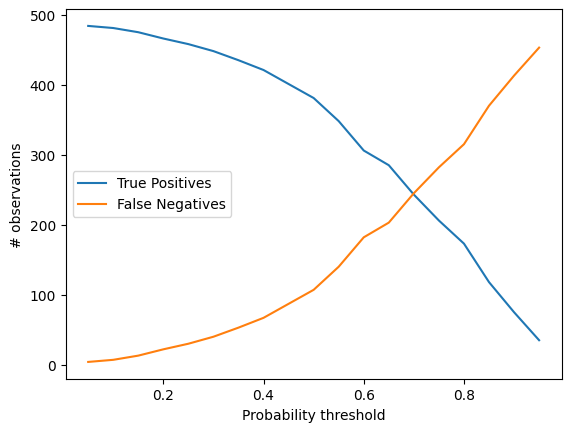

In [310]:
plt.plot(np.linspace(0.05,0.95,19), true_positives, label='True Positives')
plt.plot(np.linspace(0.05,0.95,19), false_negatives, label='False Negatives')
plt.xlabel('Probability threshold')
plt.ylabel('# observations')
plt.legend();

### Answer:
As we increase the probability threshold our predictions become more conservative (predict Churn only for observations with high probability), therefore Number of TP decreases and number of FN increases

# 12. Estimate revenue

Let's consider a toy economic setup:
1. Each client earns a company $50\$$ per month
2. If you predict that a client will churn, the company can provide she with a discount of $200\$$ and the client will stay for another year

If the company do nothing (has no Churn model), then the revenue over the year will be:

$$S = N*50*12 + P*0$$

where N (negative) is number of non-Churn clients, and P (positive) is number of clients who Churn. If the company implements some Churn model, the revenue will be the following:

$$S = TN*50*12 + FP*(50*12-200) + TP*(50*12-200)  + FN * 0$$

where 
- TN are non-Churning clients, predicted as non-Churning (true negatives)
- FP are non-Churning clients, predicted as Churning (false positives)
- TP are Churning clients, predicted as Churning (true positives)
- FN are Churning clients, predicted as non-Churning (false negatives)

## Compute the revenue for different thresholds based on your model, what is the optimal probability threshold? Report two numbers divided by a comma, e.g. `0.5,1500000`

In [316]:
profit = []
max_profit = 0
max_profit_prob = 0
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(y_test_rf, y_pred_prob_rf>t)
    tn, fp, tp, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
    S = tn*50*12 + fp*(50*12-200) + tp*(50*12-200) 
    if(S > max_profit):
        max_profit = S
        max_profit_prob = t
    profit.append(S)

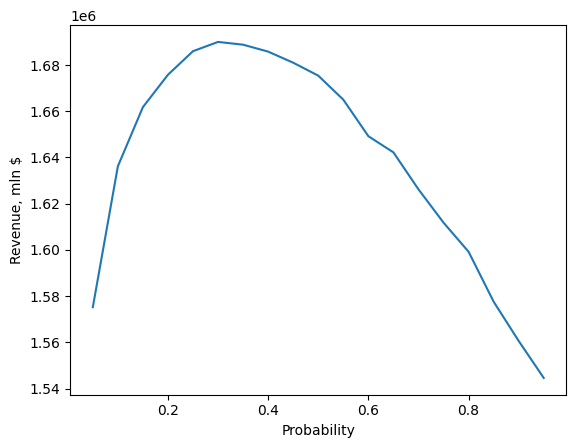

In [317]:
plt.plot(np.linspace(0.05,0.95,19), profit);
plt.xlabel('Probability')
plt.ylabel('Revenue, mln $');

In [318]:
print(f"Optimal probability threshold characteristics: {max_profit_prob, max_profit}")

Optimal probability threshold characteristics: (0.3, 1690000)


### Answer:
(0.3, 1689400)

# 13. Compute economic value

Is there any economic value from introducing a ML model (compared to not using a model and not providing a discounts)?

First scenario - no ML model, no discounts; Second scenario - ML model from question 12.

In [319]:
num_non_churned_customers = total_customers - num_churned_customers
S_no_ml = num_non_churned_customers * 50 * 12
S_no_ml

5100000

### Answer:
There is no economic value (5100000 > 1689400), as the revenue is smaller in the second scenario.

# 14. Build a confusion matrix

assosiated with an optimal probability threshold. What happend to the number of False Positives and False Negatives, compared to the default probability threshold (question 10)?

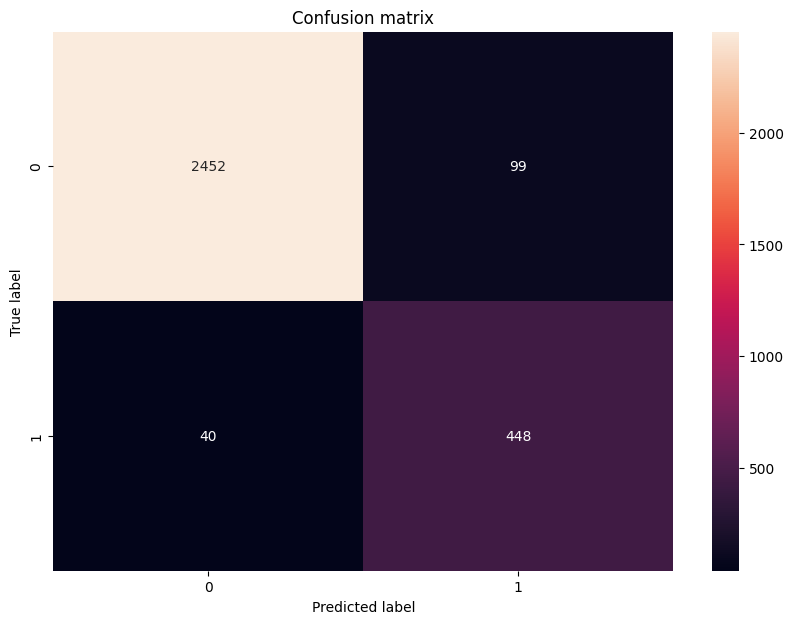

In [322]:
y_pred_rf_opt = (y_pred_prob_rf > 0.3)

# Create confusion matrix
cm_opt = confusion_matrix(y_test_rf, y_pred_rf_opt)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm_opt, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Answer:
Since we decreased probability threshold number of FP goes up, number of FN goes down


# 15. What if the price to keep the client goes up to 500?

Does optimal probability treshold changes?

In [324]:
profit = []
max_profit = 0
max_profit_prob = 0
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(y_test_rf, y_pred_prob_rf>t)
    tn, fp, tp, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
    S = tn*50*12 + fp*(50*12-500) + tp*(50*12-500) 
    if(S > max_profit):
        max_profit = S
        max_profit_prob = t
    profit.append(S)

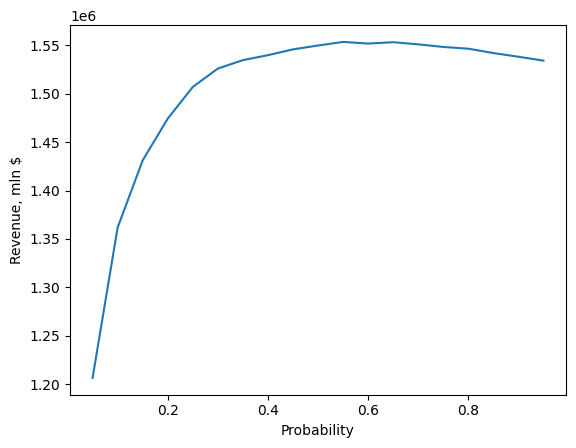

In [325]:
plt.plot(np.linspace(0.05,0.95,19), profit);
plt.xlabel('Probability')
plt.ylabel('Revenue, mln $');

In [326]:
print(f"Optimal probability threshold characteristics: {max_profit_prob, max_profit}")

Optimal probability threshold characteristics: (0.5499999999999999, 1553400)


# 16. Built an assosiated confusion matrix

How many False Positives and False Negatives do you have?

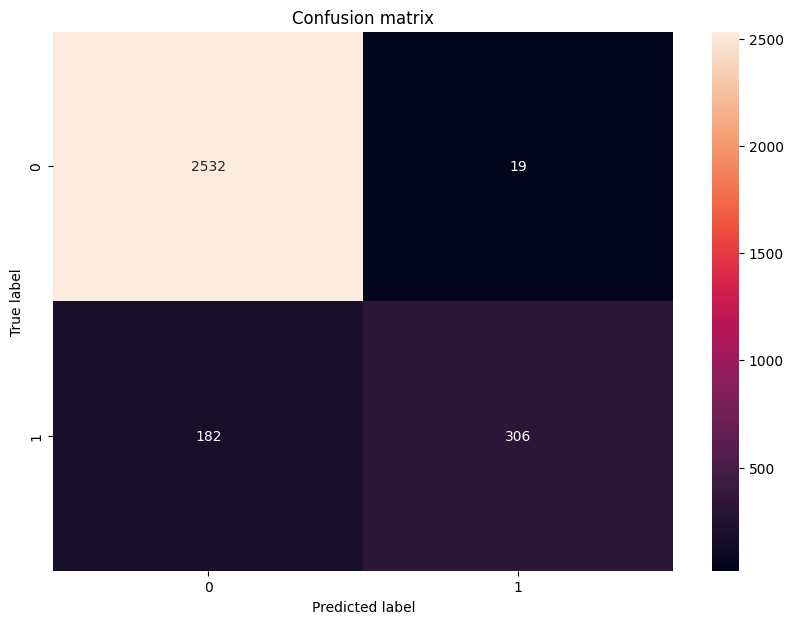

In [328]:
y_pred_rf_opt = (y_pred_prob_rf > 0.6)

# Create confusion matrix
cm_opt = confusion_matrix(y_test_rf, y_pred_rf_opt)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm_opt, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 17. Compare confusion matrices from 14 and 16



# 18. Train catboost

Train a catboost.CatBoostClassifier on a **unprocessed data** (no preprocessing for categorical columns) with default hyperparameters, see example below.

In [367]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

In [368]:
from catboost import CatBoostClassifier, Pool

In [369]:
# Split the data into features (X) and the target variable (y)
X_cb = df.drop('Attrition_Flag', axis=1)
y_cb = df['Attrition_Flag']

# Split the data into train and test sets
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, test_size=0.3, stratify=y_cb, random_state=10)

In [372]:
print("Categorical columns (features):", categorical_columns)
dataset_train = Pool(X_train_cb, y_train_cb, categorical_columns)
dataset_test = Pool(X_test_cb, y_test_cb, categorical_columns)

Categorical columns (features): ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [373]:
clf_cb = CatBoostClassifier()

In [374]:
clf_cb.fit(dataset_train, eval_set=dataset_test, verbose=50)

Learning rate set to 0.051403
0:	learn: 0.6273653	test: 0.6282227	best: 0.6282227 (0)	total: 6.17ms	remaining: 6.17s
50:	learn: 0.1283737	test: 0.1416967	best: 0.1416967 (50)	total: 315ms	remaining: 5.86s
100:	learn: 0.0871291	test: 0.1066092	best: 0.1066092 (100)	total: 643ms	remaining: 5.72s
150:	learn: 0.0686615	test: 0.0926534	best: 0.0926534 (150)	total: 936ms	remaining: 5.26s
200:	learn: 0.0559868	test: 0.0850185	best: 0.0850185 (200)	total: 1.22s	remaining: 4.86s
250:	learn: 0.0469011	test: 0.0802753	best: 0.0802753 (250)	total: 1.5s	remaining: 4.48s
300:	learn: 0.0406412	test: 0.0776725	best: 0.0776725 (300)	total: 1.79s	remaining: 4.15s
350:	learn: 0.0346249	test: 0.0749001	best: 0.0748971 (349)	total: 2.08s	remaining: 3.85s
400:	learn: 0.0302680	test: 0.0739460	best: 0.0739460 (400)	total: 2.37s	remaining: 3.54s
450:	learn: 0.0270237	test: 0.0732529	best: 0.0732529 (450)	total: 2.66s	remaining: 3.24s
500:	learn: 0.0243940	test: 0.0733866	best: 0.0731938 (499)	total: 2.96s	rem

In [375]:
y_pred_test_proba = clf_cb.predict_proba(X_test)

In [376]:
# Convert probabilities to binary predictions
y_pred_test_cb = (y_pred_test_proba[:, 1] > 0.5)

In [399]:
y_test_cb.replace(to_replace='Existing Customer', value=False, inplace=True)
y_test_cb.replace(to_replace='Attrited Customer',  value=True, inplace=True)
print(f1_score(y_test_cb, y_pred_test_cb))

0.03017382748442112


# 19. Compute ROC AUC score for your RandomForest and Catboost model

Comment on how increase/decrease in roc auc (machine learning metric) compares with increase/decrease of revenue (business metric). Propose how you could improve the economic model to make it more realistic (and how to use your ML model in this new setup). Upload a pdf, up to 500 words.

In [379]:
print(roc_auc_score(y_test_cb, y_pred_test_cb))

0.05418720398943519


In [381]:
print(roc_auc_score(y_test_rf, y_pred_rf))

0.8740914845351548


In [383]:
from sklearn.metrics import roc_curve

In [396]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_pred_rf)

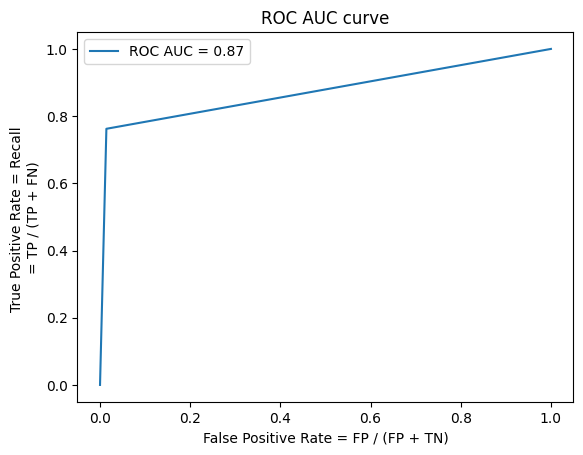

In [398]:
plt.plot(fpr_rf, tpr_rf, label=f'ROC AUC = {np.round(roc_auc_score(y_test_rf, y_pred_rf), 2)}');
plt.legend()
plt.xlabel('False Positive Rate = FP / (FP + TN)')
plt.ylabel('True Positive Rate = Recall \n= TP / (TP + FN)')
plt.title('ROC AUC curve');

In [392]:
fpr_cb, tpr_cb, thresholds_cb = roc_curve(y_test_cb, y_pred_test_cb)

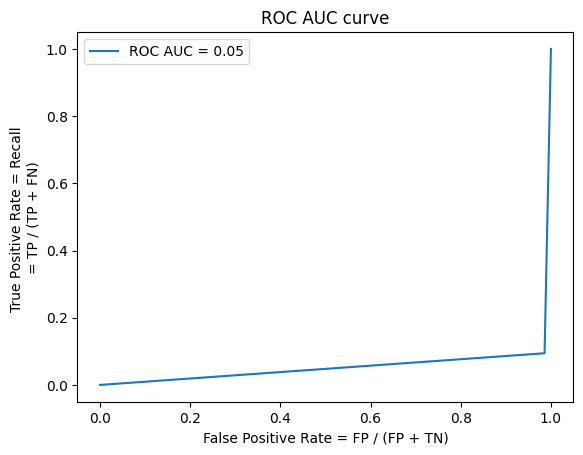

In [395]:
plt.plot(fpr_cb, tpr_cb, label=f'ROC AUC = {np.round(roc_auc_score(y_test_cb, y_pred_test_cb), 2)}');
plt.legend()
plt.xlabel('False Positive Rate = FP / (FP + TN)')
plt.ylabel('True Positive Rate = Recall \n= TP / (TP + FN)')
plt.title('ROC AUC curve');

# 20. Upload your ipynb solution